In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
%matplotlib widget

import importlib
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf


In [142]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
importlib.reload(mf)

<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [143]:
#names = ["20240717_activation_WT4A_control_1", "20240718_activation_WT4A_qE_act_1", "20240719_activation_WT4A_qE_act_2"]
names = ["20240723_activation_stt71A6_control_1", "20240723_activation_stt71A6_qE_act_1", 
         "20240724_activation_stt71A6_control_2", "20240724_activation_stt71A6_qE_act_2",
         "20240725_activation_stt71A6_control_3", "20240725_activation_stt71A6_qE_act_3",]



results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/params.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
    results[-1]["Actinic_uE"] = [0, 26.9, 93.1, 157.4, 232.5, 365.5, 591.3]
    results[-1]["ETR_uE"] = results[-1]["phi_stat"] * results[-1]["Actinic_uE"]


In [144]:
results[0]

,Record,Actinic,F_max,F_stat,F_0,phi_stat,phi_0,NPQ,ETR,Actinic_uE,ETR_uE
0,AL0,0,1.000000,0.227351,0.224382,0.772649,0.775618,0.000000,0.000000,0.0,0.000000
1,AL10,10,0.987716,0.395967,0.232981,0.599108,0.764122,0.012437,5.991082,26.9,16.116011
2,AL20,20,0.934675,0.490201,0.231033,0.475539,0.752820,0.069891,9.510778,93.1,44.272673
3,AL30,30,0.901790,0.521612,0.234065,0.421582,0.740444,0.108905,12.647458,157.4,66.356997
4,AL40,40,0.871353,0.561930,0.237405,0.355107,0.727544,0.147640,14.204270,232.5,82.562317
5,AL60,60,0.854110,0.633991,0.238025,0.257717,0.721318,0.170809,15.463032,365.5,94.195637
6,AL90,90,0.835949,0.708599,0.244056,0.152342,0.708049,0.196245,13.710776,591.3,90.079795


In [145]:
control = [0, 2, 4]
qE_act = [1, 3, 5]

ETR_ctrl = []
ETR_qE = []

for i, result in enumerate(results):
    if i in control:
        ETR_ctrl.append(result["ETR"])
    if i in qE_act:
        ETR_qE.append(result["ETR"])

ETR_ctrl = np.array(ETR_ctrl)
ETR_qE = np.array(ETR_qE)


ETR_ctrl_mean = np.mean(ETR_ctrl, axis=0)
ETR_ctrl_std = np.std(ETR_ctrl, axis=0)

ETR_qE_mean = np.mean(ETR_qE, axis=0)
ETR_qE_std = np.std(ETR_qE, axis=0)


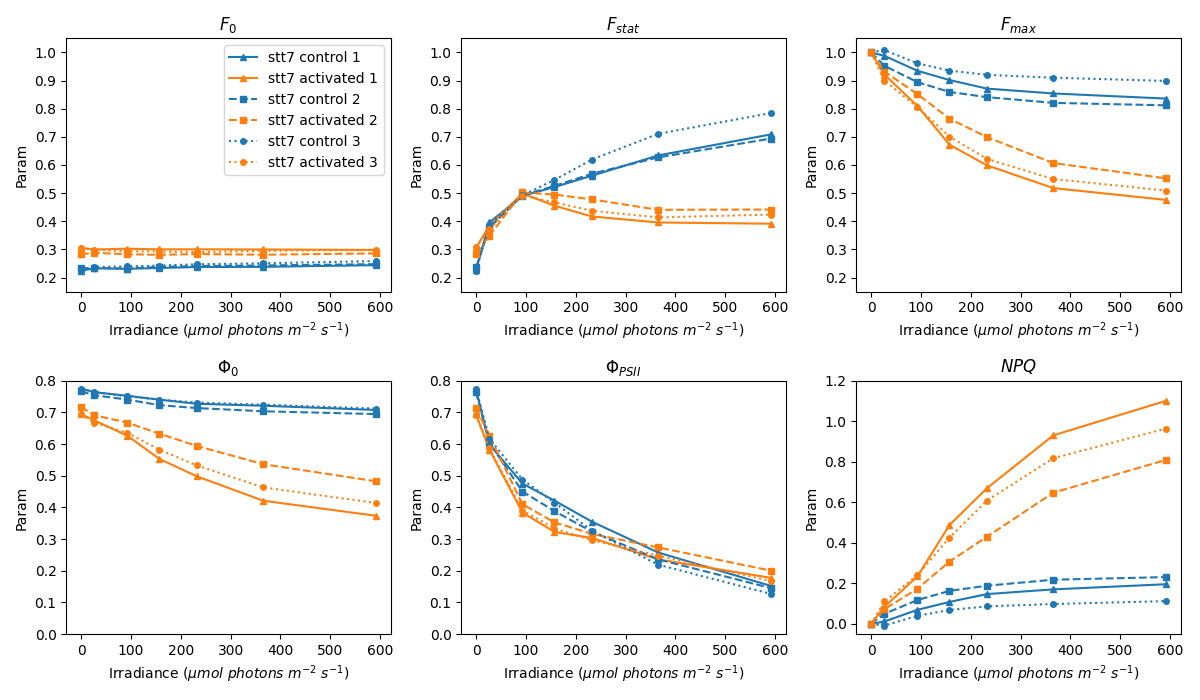

In [146]:
fig, ax = plt.subplots(2, 3, figsize=(12, 7))

control = [0, 2, 4]
qE_act = [1, 3, 5]
labels =  ["stt7 control 1", "stt7 activated 1" ] + ["stt7 control 2", "stt7 activated 2" ] + ["stt7 control 3", "stt7 activated 3"]
fmt = ['-^', '-^', '--s', '--s', ':o', ':o']
color = ['C0', 'C1', 'C0', "C1", 'C0', 'C1']
line = 1.5
marker = 4

for i, result in enumerate(results):
    
    ax[0,0].plot(result.Actinic_uE, result.F_0, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])
    ax[0,1].plot(result.Actinic_uE, result.F_stat, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])
    ax[0,2].plot(result.Actinic_uE, result.F_max, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])
    ax[1,0].plot(result.Actinic_uE, result.phi_0, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])
    ax[1,1].plot(result.Actinic_uE, result.phi_stat, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])
    ax[1,2].plot(result.Actinic_uE, result.NPQ, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])

ax[0,0].set_title("$F_0$")
ax[0,1].set_title("$F_{stat}$")
ax[0,2].set_title("$F_{max}$")
ax[1,0].set_title("$\Phi_0$")
ax[1,1].set_title("$\Phi_{PSII}$")
ax[1,2].set_title("$NPQ$")

ax[0,0].set_ylim(0.15, 1.05)
ax[0,1].set_ylim(0.15, 1.05)
ax[0,2].set_ylim(0.15, 1.05)
ax[1,0].set_ylim(0, 0.8)
ax[1,1].set_ylim(0, 0.8)
ax[1,2].set_ylim(-0.05, 1.2)

[axis.set_xlabel("Irradiance ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)") for axis in ax.ravel()]
[axis.set_ylabel("Param") for axis in ax.ravel()]

ax[0, 0].legend(loc = 'upper right')

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/compare_params.png", dpi=300)

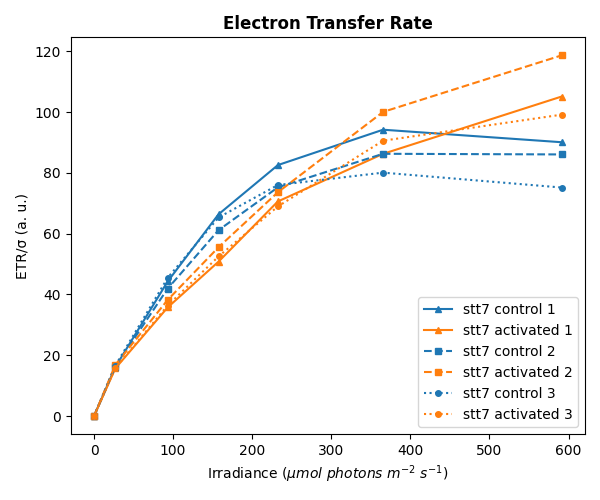

In [147]:
fig, ax = plt.subplots(figsize = (6,5))
ax.set_title("Electron Transfer Rate", fontweight = 'bold')

control = [0, 2, 4]
qE_act = [1, 3, 5]

labels =  ["stt7 control 1", "stt7 activated 1" ] + ["stt7 control 2", "stt7 activated 2" ] + ["stt7 control 3", "stt7 activated 3"]
fmt = ['-^', '-^', '--s', '--s', ':o', ':o']
color = ['C0', 'C1', 'C0', "C1", 'C0', 'C1']
line = 1.5
marker = 4

for i, result in enumerate(results):
    ETR = result.ETR_uE
    light = result.Actinic_uE
    ax.plot(light, ETR, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])


ax.legend(loc = 'lower right')

ax.set_xlabel("Irradiance ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("ETR/σ (a. u.)")

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/compare_ETR.png", dpi=300)

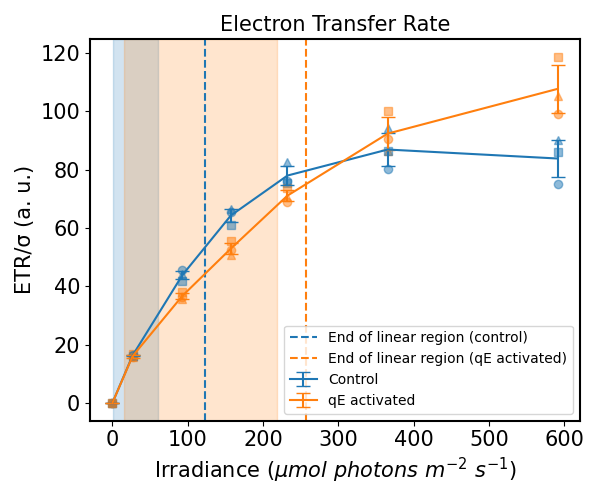

In [148]:
fig, ax = plt.subplots(figsize = (6,5))
ax.set_title("Electron Transfer Rate", fontweight = 'bold')

def get_light_uE(light):
    return 5.37*light-26.33

control = [0, 2, 4]
qE_act = [1, 3, 5]

labels =  ["stt7 control 1", "stt7 activated 1" ] + ["stt7 control 2", "stt7 activated 2" ] + ["stt7 control 3", "stt7 activated 3"]
fmt = ['^', '^', 's', 's', 'o', 'o']
color = ['C0', 'C1', 'C0', "C1", 'C0', 'C1']
line = 1.5
marker = 6

ETR_ctrl = []
ETR_qE = []

for i, result in enumerate(results):
    
    if i in control:
        ETR_ctrl.append(result["ETR_uE"])
    if i in qE_act:
        ETR_qE.append(result["ETR_uE"])
    
    ETR = result.ETR_uE
    light = result.Actinic_uE
    ax.plot(light, ETR, fmt[i], markersize = marker, color = color[i], alpha = 0.5)

ETR_ctrl = np.array(ETR_ctrl)
ETR_qE = np.array(ETR_qE)

ETR_ctrl_mean = np.mean(ETR_ctrl, axis=0)
ETR_ctrl_std = np.std(ETR_ctrl, axis=0)

ETR_qE_mean = np.mean(ETR_qE, axis=0)
ETR_qE_std = np.std(ETR_qE, axis=0)

ax.errorbar(light, ETR_ctrl_mean, yerr = ETR_ctrl_std, label = "Control", color = "C0", capsize=5)
ax.errorbar(light, ETR_qE_mean, yerr = ETR_qE_std, label = "qE activated", color = "C1", capsize=5)




ax.set_xlabel("Irradiance ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("ETR/σ (a. u.)")

ax = tools.poster_axes(ax, title = "Electron Transfer Rate", xlabel = "Irradiance ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)", ylabel = "ETR/σ (a. u.)")

ymin, ymax = ax.get_ylim()
ax.fill_between([1, 61], ymin, ymax, color = "C0", alpha = 0.2)
ax.fill_between([15, 218], ymin, ymax, color = "C1", alpha = 0.2)

ax.set_ylim(ymin, ymax)


popt, pcov, xfit, yfit = tools.Ek_fit(light, ETR_ctrl_mean, 0, 100, 100, p0 = [15, 20])
Ek_ctrl = popt[1]
ax.axvline(popt[1], color = "C0", linestyle = "--", label = "End of linear region (control)")

popt, pcov, xfit, yfit = tools.Ek_fit(light, ETR_qE_mean, 0, 100, 100, p0 = [15, 20])
Ek_qE = popt[1]
ax.axvline(popt[1], color = "C1", linestyle = "--", label = "End of linear region (qE activated)")



ax.legend(loc = 'lower right')

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/compare_ETR.png", dpi=300)

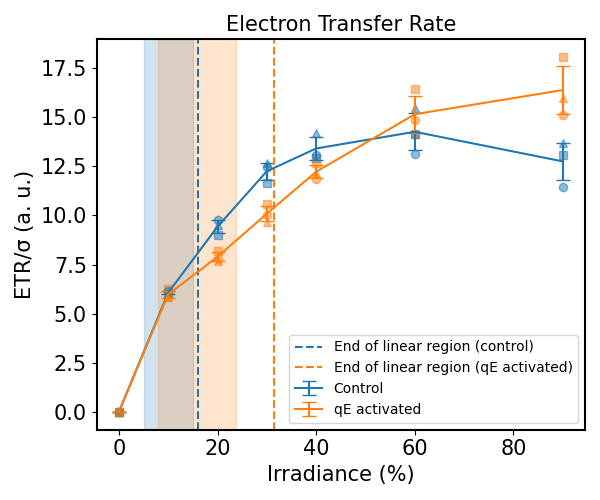

In [149]:
fig, ax = plt.subplots(figsize = (6,5))
ax.set_title("Electron Transfer Rate", fontweight = 'bold')

def get_light_uE(light):
    return 5.37*light-26.33

control = [0, 2, 4]
qE_act = [1, 3, 5]

labels =  ["stt7 control 1", "stt7 activated 1" ] + ["stt7 control 2", "stt7 activated 2" ] + ["stt7 control 3", "stt7 activated 3"]
fmt = ['^', '^', 's', 's', 'o', 'o']
color = ['C0', 'C1', 'C0', "C1", 'C0', 'C1']
line = 1.5
marker = 6

ETR_ctrl = []
ETR_qE = []

for i, result in enumerate(results):
    
    if i in control:
        ETR_ctrl.append(result["ETR"])
    if i in qE_act:
        ETR_qE.append(result["ETR"])
    
    ETR = result.ETR
    light = result.Actinic
    ax.plot(light, ETR, fmt[i], markersize = marker, color = color[i], alpha = 0.5)

ETR_ctrl = np.array(ETR_ctrl)
ETR_qE = np.array(ETR_qE)

ETR_ctrl_mean = np.mean(ETR_ctrl, axis=0)
ETR_ctrl_std = np.std(ETR_ctrl, axis=0)

ETR_qE_mean = np.mean(ETR_qE, axis=0)
ETR_qE_std = np.std(ETR_qE, axis=0)

ax.errorbar(light, ETR_ctrl_mean, yerr = ETR_ctrl_std, label = "Control", color = "C0", capsize=5)
ax.errorbar(light, ETR_qE_mean, yerr = ETR_qE_std, label = "qE activated", color = "C1", capsize=5)




ax.set_xlabel("Irradiance ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("ETR/σ (a. u.)")

ax = tools.poster_axes(ax, title = "Electron Transfer Rate", xlabel = "Irradiance (%)", ylabel = "ETR/σ (a. u.)")

ymin, ymax = ax.get_ylim()
ax.fill_between([5, 15], ymin, ymax, color = "C0", alpha = 0.2)
ax.fill_between([7.91, 23.75], ymin, ymax, color = "C1", alpha = 0.2)

ax.set_ylim(ymin, ymax)


popt, pcov, xfit, yfit = tools.Ek_fit(light, ETR_ctrl_mean, 0, 100, 100, p0 = [15, 20])
ax.axvline(popt[1], color = "C0", linestyle = "--", label = "End of linear region (control)")

popt, pcov, xfit, yfit = tools.Ek_fit(light, ETR_qE_mean, 0, 100, 100, p0 = [15, 20])
ax.axvline(popt[1], color = "C1", linestyle = "--", label = "End of linear region (qE activated)")



ax.legend(loc = 'lower right')

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/compare_ETR.png", dpi=300)

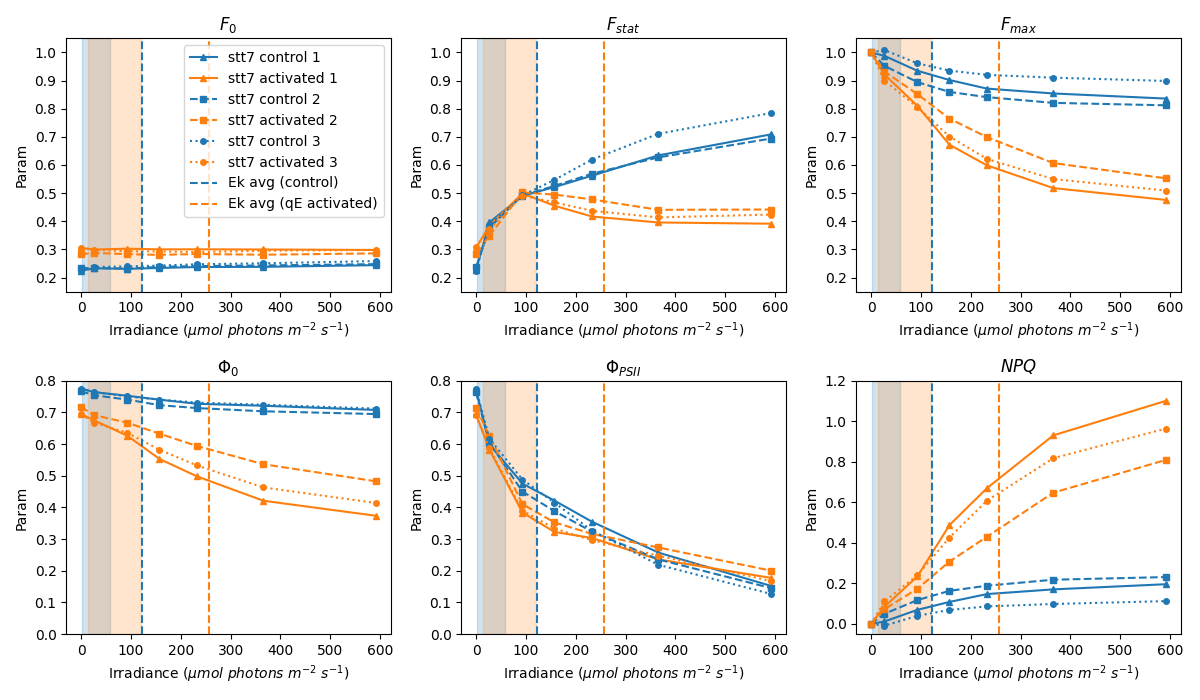

In [150]:
fig, ax = plt.subplots(2, 3, figsize=(12, 7))

control = [0, 2, 4]
qE_act = [1, 3, 5]
labels =  ["stt7 control 1", "stt7 activated 1" ] + ["stt7 control 2", "stt7 activated 2" ] + ["stt7 control 3", "stt7 activated 3"]
fmt = ['-^', '-^', '--s', '--s', ':o', ':o']
color = ['C0', 'C1', 'C0', "C1", 'C0', 'C1']
line = 1.5
marker = 4

for i, result in enumerate(results):
    
    ax[0,0].plot(result.Actinic_uE, result.F_0, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])
    ax[0,1].plot(result.Actinic_uE, result.F_stat, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])
    ax[0,2].plot(result.Actinic_uE, result.F_max, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])
    ax[1,0].plot(result.Actinic_uE, result.phi_0, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])
    ax[1,1].plot(result.Actinic_uE, result.phi_stat, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])
    ax[1,2].plot(result.Actinic_uE, result.NPQ, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])
    
ax[0,0].set_title("$F_0$")
ax[0,1].set_title("$F_{stat}$")
ax[0,2].set_title("$F_{max}$")
ax[1,0].set_title("$\Phi_0$")
ax[1,1].set_title("$\Phi_{PSII}$")
ax[1,2].set_title("$NPQ$")

ax[0,0].set_ylim(0.15, 1.05)
ax[0,1].set_ylim(0.15, 1.05)
ax[0,2].set_ylim(0.15, 1.05)
ax[1,0].set_ylim(0, 0.8)
ax[1,1].set_ylim(0, 0.8)
ax[1,2].set_ylim(-0.05, 1.2)

for axis in ax.ravel():
    ymin, ymax = axis.get_ylim()
    axis.fill_between([1, 58.8], ymin, ymax, color = "C0", alpha = 0.2)
    axis.fill_between([15, 120], ymin, ymax, color = "C1", alpha = 0.2)
    axis.set_ylim(ymin, ymax)
    axis.axvline(Ek_ctrl, color = "C0", linestyle = "--", label = "Ek avg (control)")
    axis.axvline(Ek_qE, color = "C1", linestyle = "--", label = "Ek avg (qE activated)")

[axis.set_xlabel("Irradiance ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)") for axis in ax.ravel()]
[axis.set_ylabel("Param") for axis in ax.ravel()]

ax[0, 0].legend(loc = 'upper right')

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/compare_params.png", dpi=300)

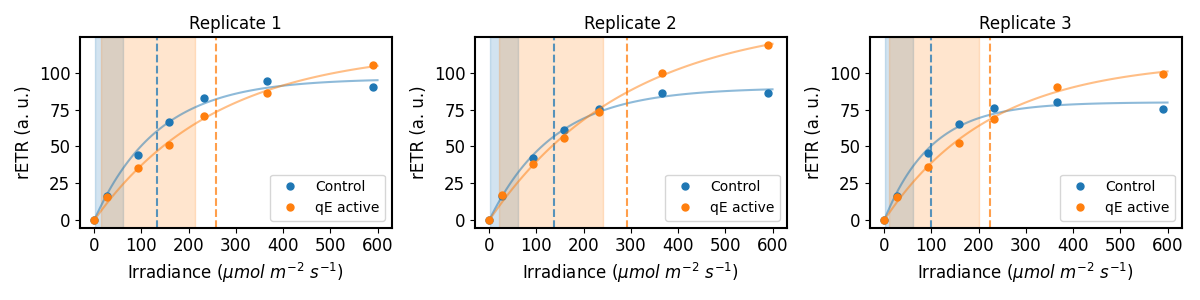

In [159]:
importlib.reload(tools)

fig, ax = plt.subplots(1,3, figsize = (12, 3))

Control = [0, 2, 4]
qE_act = [1, 3, 5]

fill_btw = [[1, 61], [14, 214], [1, 61], [21, 241], [1, 61], [11, 200]]


labels =  ["Control", "qE active" ] + ["Control", "qE active" ] + ["Control", "qE active"]
fmt = ['^', '^', 's', 's', 'o', 'o']
color = ['C0', 'C1', 'C0', "C1", 'C0', 'C1']
line = 1.5
marker = 5

ETR_ctrl = []
ETR_qE = []

Ek_ctrl = []
Ek_ctrl_err = []
Ek_qE = []
Ek_qE_err = []

for i, result in enumerate(results):
    if i in [0, 1]:
        ax_2plot = 0
    if i in [2, 3]:
        ax_2plot = 1
    if i in [4, 5]:
        ax_2plot = 2
    
    light = result.Actinic_uE
    ETR = result.ETR_uE
    ax[ax_2plot].plot(light, ETR,'o', markersize = marker, color = color[i], label = labels[i])
    popt, pcov, xfit, yfit = tools.Ek_fit(light, ETR, 0, 600, 100, p0 = [15, 20])
    ax[ax_2plot].axvline(popt[1], color = color[i], linestyle = "--", alpha = 0.75)
    ax[ax_2plot].plot(xfit, yfit, color = color[i], linestyle = "-", alpha = 0.5)
    ax[ax_2plot].fill_between(fill_btw[i], -5, 124, color = color[i], alpha = 0.2)
    if i in Control:
        Ek_ctrl.append(popt[1])
        Ek_ctrl_err.append(np.sqrt(np.diag(pcov))[1])
    elif i in qE_act:
        Ek_qE.append(popt[1])
        Ek_qE_err.append(np.sqrt(np.diag(pcov))[1])
    
    

for axis in ax:
    axis = tools.poster_axes(axis, title = None, xlabel = "Irradiance ($µmol$ $m^{-2}$ $s^{-1}$)", ylabel = "rETR (a. u.)", ticklabelsize= 12, labelsize = 12)
    axis.set_ylim(-5, 124)
    axis.legend(loc = 'lower right')
    
ax[0].set_title("Replicate 1")
ax[1].set_title("Replicate 2")
ax[2].set_title("Replicate 3")

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/compare_ETR_good.png", dpi=300)

In [157]:
Ek_ctrl, Ek_ctrl_err

([133.8682192837553, 136.8963818639808, 99.81170019912338],
 [13.724517889112118, 8.582356273222716, 10.723386240323977])

In [158]:
Ek_qE, Ek_qE_err    

([257.319439367422, 291.20219538522116, 224.509850619608],
 [19.944387626102976, 22.993725597856958, 17.66797812842668])